# Trabajo Práctico 6
Utilizando la webcam:
1. Implementar un algoritmo utilizando filtros de Haar en
cascada que:
* Detecte Rostros
* Dentro de los rostros detecte ojos
* Dentro de los rostros detecte sonrisas

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import time
cv.destroyAllWindows()

In [2]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib

Using matplotlib backend: MacOSX


#### Cargamos los clasificadores pre-entrenados

El entrenamiento se basa en los filtros de Haar

![image.png](attachment:image.png)

Existen varios archivos con clasificadores pre-entrenados disponibles en OpenCV: <br>

- haarcascade_eye_tree_eyeglasses.xml
- haarcascade_mcs_leftear.xml
- haarcascade_eye.xml
- haarcascade_mcs_lefteye.xml
- haarcascade_frontalface_alt2.xml
- haarcascade_mcs_mouth.xml
- haarcascade_frontalface_alt_tree.xml
- haarcascade_mcs_nose.xml
- haarcascade_frontalface_alt.xml
- haarcascade_mcs_rightear.xml
- haarcascade_frontalface_default.xml
- haarcascade_mcs_righteye.xml
- haarcascade_fullbody.xml
- haarcascade_mcs_upperbody.xml
- haarcascade_lefteye_2splits.xml
- haarcascade_profileface.xml
- haarcascade_lowerbody.xml
- haarcascade_righteye_2splits.xml
- haarcascade_mcs_eyepair_big.xml
- haarcascade_smile.xml
- haarcascade_mcs_eyepair_small.xml
- haarcascade_upperbody.xml

In [3]:
# Leemos los clasificadores pre-entrenados (instalados en cv2/data/haarcascades/)
#--------------------------------------------------------------------------------
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_smile.xml')

#### Aplicamos el clasificador en cascada

La función utilizada es la siguiente:

cv2.CascadeClassifier.detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]])

Donde:

- __image__ : Matriz del tipo CV_8U que contiene una imagen donde se detectan objetos.
- __scaleFactor__ : parámetro que especifica cuánto se reduce el tamaño de la imagen en cada escala de imagen.
- __minNeighbors__ : parámetro que especifica cuántos vecinos debe tener cada rectángulo candidato para retenerlo. Este parámetro afectará la calidad de las caras detectadas: un valor más alto da como resultado menos detecciones pero con una calidad más alta.
- __flags__ : Parámetro con el mismo significado para una cascada antigua que en la función cvHaarDetectObjects. No se utiliza para una nueva cascada.
- __minSize__ : Tamaño mínimo posible del objeto. Los objetos más pequeños que eso se ignoran.
- __maxSize__ : Tamaño máximo de objeto posible. Los objetos más grandes que eso se ignoran.

El factor de escala se utiliza para crear una pirámide de escala como se muestra en la imagen de abajo. Supongamos que el factor de escala es 1.03, significa que estamos usando un pequeño paso para cambiar el tamaño, es decir, reducimos el tamaño en un 3%, aumentamos la posibilidad de encontrar un tamaño coincidente con el modelo para la detección, aunque es caro.

___

In [16]:
camera = cv.VideoCapture(1) 

In [17]:
ret, frame = camera.read()
cv.imshow('Frame',frame)

In [18]:
camera.release()
cv.destroyAllWindows()

In [32]:
def tracking_detections(img: np.ndarray):
    # Cargamos la imagen a analizar
    #------------------------------
    original_image = img.copy()

    # Pasamos la imagen a escala de grises
    #-------------------------------------
    grayImage = cv.cvtColor(original_image, cv.COLOR_BGR2GRAY)
    grayImage = cv.equalizeHist(grayImage)

    # Llamamos al clasificador de Haar (AdaBoost)
    #--------------------------------------------
    #faces = face_cascade.detectMultiScale(grayImage, 1.012, 5)
    faces = face_cascade.detectMultiScale(grayImage, 1.1, minNeighbors=3, minSize=(100,130), maxSize=(450,600))

    # Recorro las caras encontradas
    #------------------------------
    for (x,y,w,h) in faces:
        # Le dibujamos un rectángulo amarillo
        cv.rectangle(original_image,(x,y),(x+w,y+h),(255,255,0),2)
        # Definimos las ROIs en la imagen gris y color
        roi_gray = grayImage[y:y+h, x:x+w] 
        roi_color = original_image[y:y+h, x:x+w] 
        # Para cada rostro hallado le buscamos los ojos
        eyes = eye_cascade.detectMultiScale(roi_gray, minSize=(80,80), maxSize=(150,150))
        # En los ojos hallados les dibujamos rectángulos
        for (ex,ey,ew,eh) in eyes:
            cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0), 2)
        # Para cada rostro hallado le buscamos la sonrisa
        smiles = smile_cascade.detectMultiScale(roi_gray, minNeighbors=10, minSize=(150,100), maxSize=(200,150))
        # En las sonrisas halladas dibujamos rectángulos
        
        for (sx,sy,sw,sh) in smiles:
            #cv.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,255,255),2)
            triangle = np.array([[[sx, sy], [sx+sw, sy], [sx+int(sw/2), sy+sh]]], np.int32)
            cv.polylines(roi_color, [triangle], True, (0,255,255), thickness=2)
    
    return original_image
    
res = tracking_detections(frame)
cv.imshow('Deteccion de caras con filtros de Haar en cascada', res) 
cv.waitKey(0)

#time.sleep(10) 
cv.destroyAllWindows()

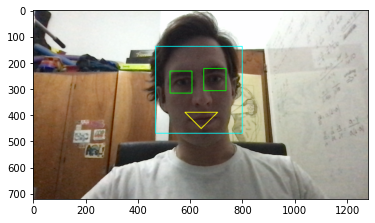

In [20]:
%matplotlib inline
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))

In [33]:
%matplotlib
#cv.imshow('Deteccion de caras con filtros de Haar en cascada', res) 

Using matplotlib backend: MacOSX


In [35]:
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 1, 10 )

camera = cv.VideoCapture(1)

while(1):
    ret, frame = camera.read()
    
    if ret == True:
        res = tracking_detections(frame)
        cv.imshow('Live Detection', res) 
        
        # If the ESC kay is pressed, stop the execution
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
        
cv.destroyAllWindows()
camera.release()

In [36]:
cv.destroyAllWindows()